conda install -c anaconda statsmodels

This notebook was made using different sources (such as Kaggle), all the credits are for the original authors.

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [13]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size
    return mean + np.sqrt(variance) * np.random.randn(size)

In [ ]:
# For reproducibility
np.random.seed(12345)


In [22]:
N = 100
X = np.c_[dnorm(0, 0.4, size=N), dnorm(0, 0.6, size=N),dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5] # we know the beta parameters

y = np.dot(X, beta) + eps

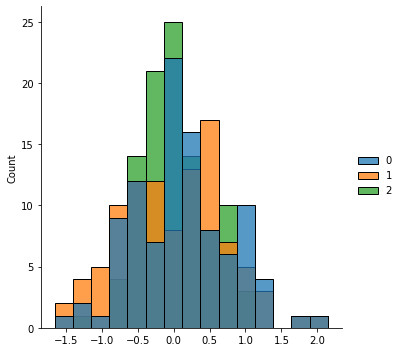

In [17]:
import seaborn as sns

sns.displot(X)

In [19]:
eps[:10]

array([-0.03216368,  0.38403649, -0.06937435, -0.35823631, -0.01418523,
       -0.1995562 ,  0.31647571, -0.17321608,  0.41233577, -0.44543023])

In [21]:
beta

[0.1, 0.3, 0.5]

In [24]:
y[:10]

array([ 0.07044032,  0.05642053,  0.65374289, -0.37033694, -0.31748442,
       -0.17756969,  0.49670273, -0.55912726,  0.73913504,  0.28139272])

let's add an intercept term

In [30]:
X_model = sm.add_constant(X)

X_model[:5]

array([[ 1.        ,  0.13667822, -0.94753342, -0.00218427],
       [ 1.        ,  1.16555651, -0.46875098,  0.29943439],
       [ 1.        , -0.02026919,  0.91199917,  0.37035162],
       [ 1.        , -0.17245272,  0.10069789, -0.20387597],
       [ 1.        ,  0.50083573,  0.13863984, -0.29624006]])

The sm.OLS class can fit an ordinary least squares linear regression

In [31]:
?sm.OLS

In [32]:
model = sm.OLS(y, X)

results = model.fit()

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.604
Model:                            OLS   Adj. R-squared (uncentered):              0.592
Method:                 Least Squares   F-statistic:                              49.39
Date:                Mon, 05 Apr 2021   Prob (F-statistic):                    1.83e-19
Time:                        15:06:48   Log-Likelihood:                         -22.384
No. Observations:                 100   AIC:                                      50.77
Df Residuals:                      97   BIC:                                      58.58
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1051      0.056      1.892      0.062      -0.005       0.215
x2             0.2874      0.041      7.009      0.000       0.206       0.369
x3             0.6056      0.070      8.602      0.000       0.466       0.745
==============================================================================
Omnibus:                        0.299   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.383
Skew:                          -0.124   Prob(JB):                        0.826
Kurtosis:                       2.827   Cond. No.                         1.77
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
import pandas as pd
data = pd.DataFrame(X, columns=['var1', 'var2', 'var'])

In [43]:
data.head()

,var1,var2,var
0,0.136678,-0.947533,-0.002184
1,1.165557,-0.468751,0.299434
2,-0.020269,0.911999,0.370352
3,-0.172453,0.100698,-0.203876
4,0.500836,0.138640,-0.296240


In [51]:
prediction = results.predict(data[:10])
prediction

0   -0.259284
1    0.169091
2    0.484276
3   -0.112652
4   -0.086945
5    0.248094
6    0.366742
7   -0.340900
8    0.630004
9    0.275261
dtype: float64

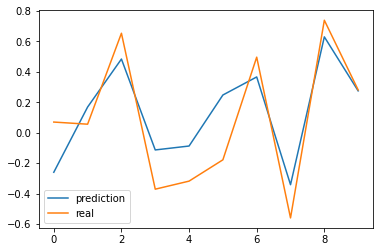

In [55]:
import matplotlib.pyplot as plt

plt.plot(prediction, label="prediction")
plt.plot(y[:10], label="real")
plt.legend()

Time series

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [2]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size
    return mean + np.sqrt(variance) * np.random.randn(size)

In [21]:
init_x = 4

import random
import numpy as np
values = [init_x, init_x]
N = 1000

b0 = 0.8
b1 = -0.4
noise = dnorm(0, 0.1, N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i]
    values.append(new_x)

In [22]:
print(values[:10])
print()
print(noise[:10])

[4, 4, 2.072960812592941, -0.15541943212051373, -1.3768960193159678, -0.6908551481596252, -0.14345671329899523, 0.2080000433439635, 0.03874458378529516, 0.36783244071531307]

[ 0.47296081 -0.21378808 -0.42337615  0.34849389 -0.141531    0.04642335
 -0.18503814  0.42003679 -0.04636437 -0.18368259]


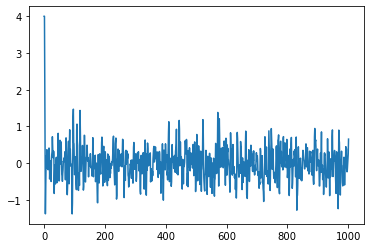

In [23]:
import matplotlib.pyplot as plt

plt.plot(values)

When you fit an AR model, you may not know the number of lagged terms to include

In [23]:
?sm.tsa.AR

In [24]:
MAXLAGS = 5
model = sm.tsa.AR(values)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWa

In [25]:
results = model.fit(MAXLAGS)

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      y   No. Observations:                 1002
Model:                          AR(5)   Log Likelihood                -274.702
Method:                          cmle   S.D. of innovations              0.319
Date:                Mon, 05 Apr 2021   AIC                             -2.273
Time:                        22:09:00   BIC                             -2.238
Sample:                             0   HQIC                            -2.260
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.010     -0.479      0.632      -0.025       0.015
L1.y           0.7601      0.032     23.909      0.000       0.698       0.822
L2.y          -0.4138      0.040    -10.376      0.000      -0.492      -0.336
L3.y           0.0487      0.042      1.161      0.245      -0.033       0.131
L4.y          -0.0527      0.040     -1.332      0.183      -0.130       0.025
L5.y          -0.0003      0.030     -0.009      0.993      -0.059       0.059
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0680           -1.0971j            1.5311           -0.1271
AR.2            1.0680           +1.0971j            1.5311            0.1271
AR.3           -0.5880           -2.7764j            2.8380           -0.2832
AR.4           -0.5880           +2.7764j            2.8380            0.2832
AR.5         -195.9291           -0.0000j          195.9291           -0.5000
-----------------------------------------------------------------------------
"""

feature engineering

In [72]:
data = [
 {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
 ]

In [73]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [74]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [75]:
import pandas as pd
pd.DataFrame(vec.fit_transform(data), columns=["Fremont", "Queen Anne", "Wallingford", "price", "rooms"])

,Fremont,Queen Anne,Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [76]:
import pandas as pd
pd.DataFrame(vec.fit_transform(data), columns=vec.get_feature_names())

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [53]:
pd.DataFrame(data)["neighborhood"]

0     Queen Anne
1        Fremont
2    Wallingford
3        Fremont
Name: neighborhood, dtype: object

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

enc = OneHotEncoder(sparse=False)
le = LabelEncoder()

enc.fit_transform(le.fit_transform(pd.DataFrame(data).neighborhood).reshape(-1, 1)) 


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [63]:
le.fit_transform(pd.DataFrame(data).neighborhood)

array([1, 0, 2, 0])

In [64]:
le.fit_transform(pd.DataFrame(data).neighborhood).reshape(-1, 1)

array([[1],
       [0],
       [2],
       [0]])

In [65]:
le.fit_transform(pd.DataFrame(data).neighborhood).reshape(-1, 1).shape

(4, 1)

In [61]:
enc.categories_

[array([0, 1, 2])]

text features

In [77]:
sample = ['problem of evil',
 'evil queen',
 'horizon problem']


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [79]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vec = TfidfVectorizer() 
X = vec.fit_transform(sample) 
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())


,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


Derived Features

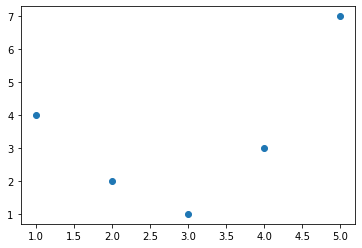

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

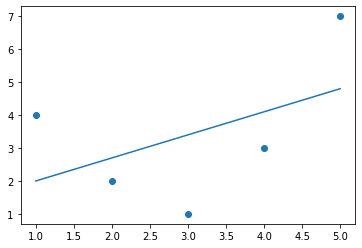

In [6]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)

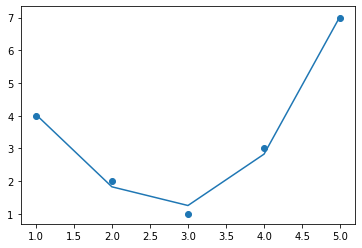

In [11]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

Inputation of missing data

In [13]:
from numpy import nan
X = np.array([[ nan, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, nan, 6 ],
              [ 8, 8, 1 ]])

y = np.array([14, 16, -1, 8, -5])

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X2 = imputer.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

## Ejemplo

https://www.kaggle.com/sinamhd9/concrete-comprehensive-strength

In [3]:
!dir

 El volumen de la unidad D es Kuky
 El n£mero de serie del volumen es: 3A98-E69F

 Directorio de D:\OneDrive\Clases\2021-1\Clase9

07/04/2021  09:33 a. m.    <DIR>          .
07/04/2021  09:33 a. m.    <DIR>          ..
07/04/2021  09:31 a. m.    <DIR>          .ipynb_checkpoints
07/04/2021  09:33 a. m.           124.928 Concrete_Data.xls
24/03/2021  03:48 p. m.         2.091.239 melb_data.csv
07/04/2021  09:33 a. m.         3.956.789 Scikit-learn.pptx
07/04/2021  09:33 a. m.           314.508 Sckit-learn.ipynb
06/04/2021  05:43 p. m.           752.324 Visualizaciones.ipynb
               5 archivos      7.239.788 bytes
               3 dirs  505.846.464.512 bytes libres


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

columns=["Cement","BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer", "CoarseAggregate", "FineAggregate", "Age", "CompressiveStrength"]

df = pd.read_excel("Concrete_Data.xls")
df.columns = columns
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


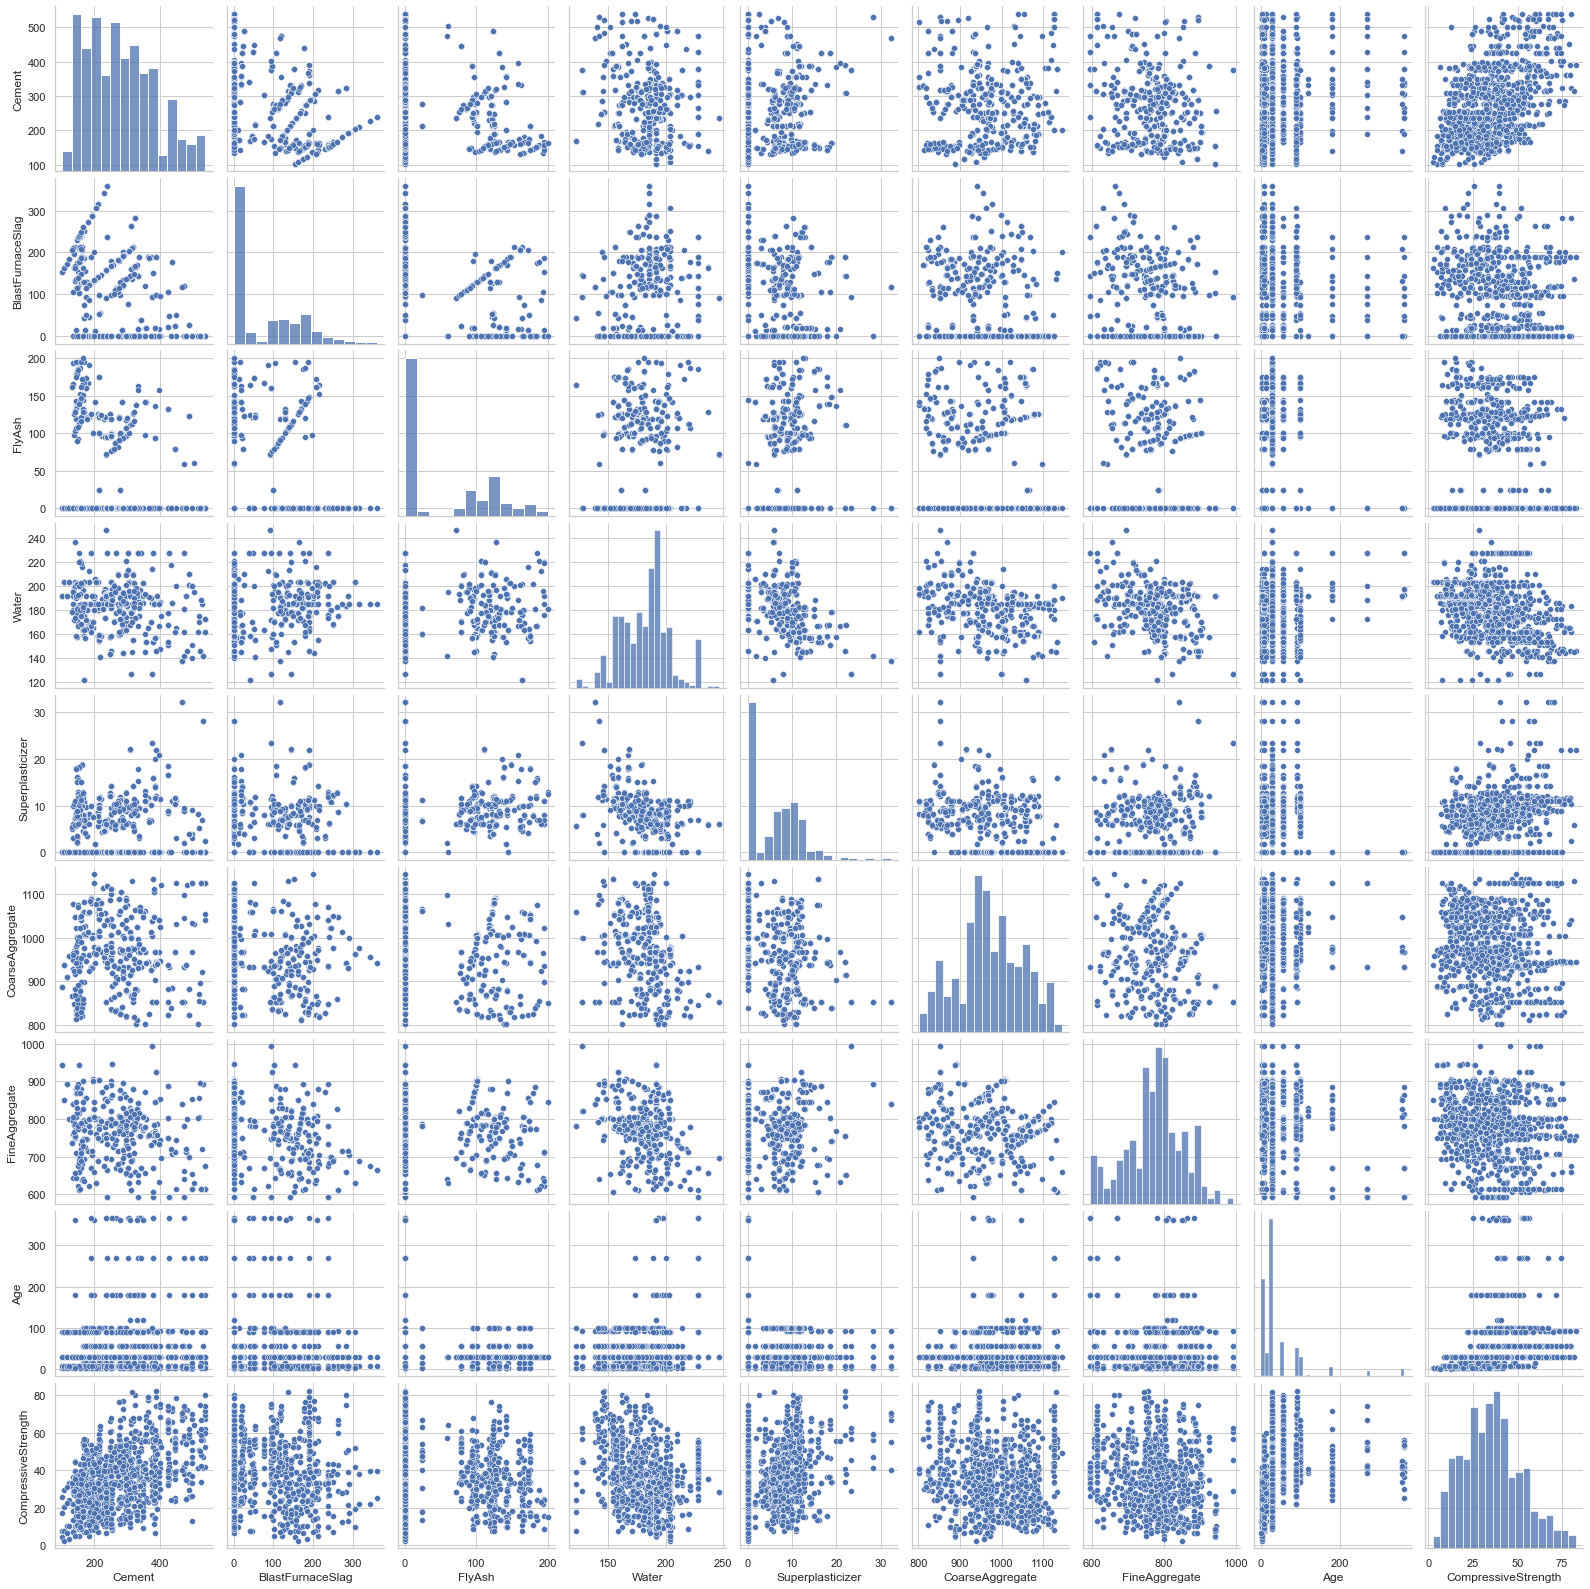

In [29]:
sns.pairplot(df)

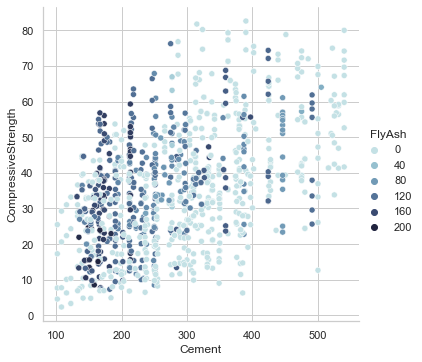

In [22]:
import seaborn as sns

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(data=df, x="Cement", y="CompressiveStrength", hue="FlyAsh", palette=cmap)

In [23]:
X = df.copy()
y = X.pop("CompressiveStrength")

baseline = RandomForestRegressor(criterion="mae", random_state=0)

baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)

baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 8.397


lets create some synthetic features

In [49]:
X = df.copy()
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

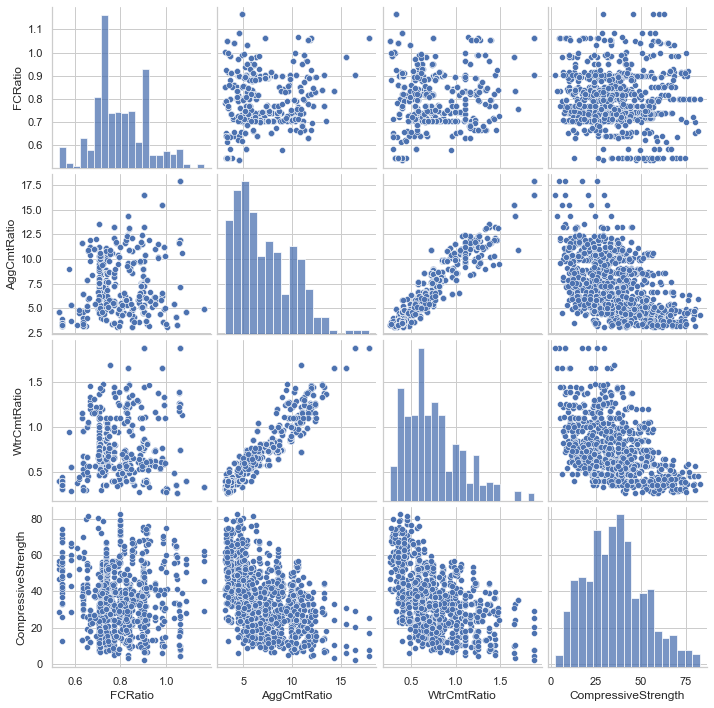

In [50]:
sns.pairplot(X[["FCRatio","AggCmtRatio", "WtrCmtRatio", "CompressiveStrength"]])

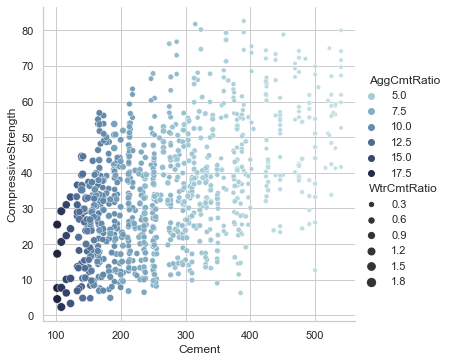

In [56]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(data=X, x="Cement", y="CompressiveStrength", hue="AggCmtRatio", size="WtrCmtRatio",palette=cmap)

In [52]:
y = X.loc[:,"CompressiveStrength"]

X_train = X.loc[:,["Cement", "AggCmtRatio", "WtrCmtRatio", "Age"]].copy()

model = RandomForestRegressor(criterion="mae", random_state=0)
score = cross_val_score(
    model, X_train, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")

MAE Score with Ratio Features: 7.831


***

Mutual Information describes relationships in terms of *uncertainty*

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("../Datasets/Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.loc[df.price == "?", "price"] = df.loc[df.price != "?"].price.astype(int).mean()

In [6]:
df.loc[df.price == "?", "price"] = df.price.astype(float)

In [7]:
X = df.copy()
y = X.pop("price").astype("int")

# label encoding for each object feature
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()


In [8]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
discrete_features.unique()

array([False])

scikit-learn has two metrics in its feature_selection module
+ real-valued targets (mutual_info_regression)
+ categorical targets (mutual_info_classif)

In [9]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

curb-weight          0.863136
city-mpg             0.732088
horsepower           0.551779
fuel-system          0.419240
drive-wheels         0.314844
compression-ratio    0.268048
symboling            0.208736
body-style           0.042652
engine-location      0.000000
Name: MI Scores, dtype: float64

In [10]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

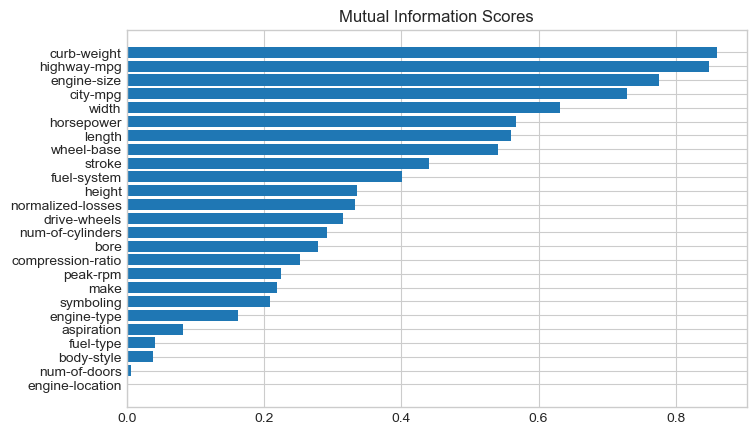

In [39]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

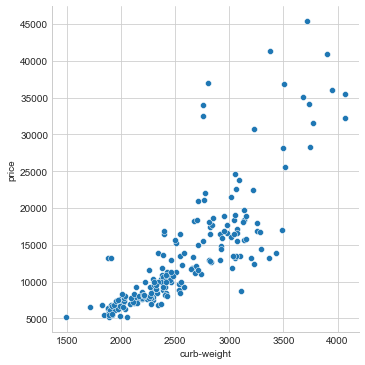

In [49]:
sns.relplot(x="curb-weight", y=y, data=X)

In [26]:
df.loc[:,["horsepower", "price", "fuel-type"]].iloc[130,:]

horsepower       ?
price         9295
fuel-type      gas
Name: 130, dtype: object

In [27]:
df.loc[df.horsepower == "?", "horsepower"] = df.loc[df.horsepower != "?"].horsepower.astype(int).mean()

In [34]:
df["horsepower"] = df.horsepower.astype(float)
df["price"] = df.price.astype(float)

In [35]:
df.loc[:,["horsepower", "price"]].dtypes

horsepower    float64
price         float64
dtype: object

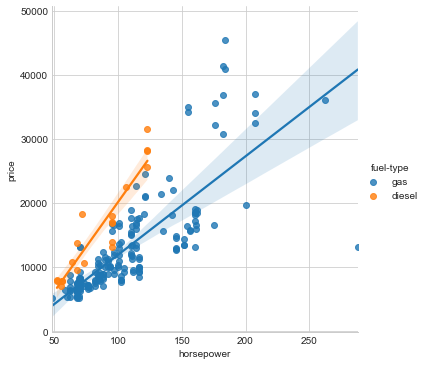

In [36]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df)

The variable *Fuel_type* has a fairly MI score, nevertheless, it seperates two price populations with different trends within the *horsepower* feature. In other words, the variable contributes an interaction effect and might not be unimportant after all.

***

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X, y = load_iris(return_X_y=True)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.08075938, 0.06575139, 0.39762707, 0.45586215])

In [40]:
model = SelectFromModel(clf, prefit=True)

In [41]:
X_new = model.transform(X)
X_new.shape   

(150, 2)

## Creating Features

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

accidents = pd.read_csv("../Datasets/US_Accidents_Dec20_updated.csv")
autos = pd.read_csv("../Datasets/Automobile_data.csv")
concrete = pd.read_excel("../Datasets/Concrete_Data.xls")
customer = pd.read_csv("../Datasets/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [57]:
concrete

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


The *stroke ratio* is a measure of how efficient an engine is versus how performant

In [62]:
autos.loc[autos.stroke == "?", "stroke"] = autos.loc[autos.stroke != "?"].stroke.astype(float).mean()
autos.loc[autos.bore == "?", "bore"] = autos.loc[autos.bore != "?"].stroke.astype(float).mean()

autos.loc[:,["stroke", "bore"]] = autos.loc[:,["stroke", "bore"]].astype(float)


In [63]:
autos["stroke_ratio"] = autos.stroke / autos.bore

In [64]:
autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [69]:
autos.columns = autos.columns.str.replace("-", "_")

In [71]:
autos.num_of_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [74]:
autos.loc[:,"num_of_cylinders"] = autos.num_of_cylinders.replace({"four": 4, "six": 6, "five":11, "eight": 5, "two":2, "three":3, "twelve":11})

More complicated a combination is, the more difficult it will be for a model to learn, like this "displacement" measure.

In [75]:
import numpy as np
autos["displacement"] = (

    np.pi * ((0.5 * autos.bore **2)) * autos.stroke * autos.num_of_cylinders
)


Data visualization can sugets transformations, often a "reshaping" of a feature applying powers or logarithms.

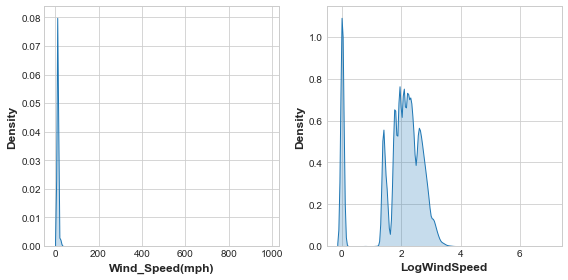

In [85]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents["Wind_Speed(mph)"].apply(np.log1p)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents["Wind_Speed(mph)"], shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

*Counts*

Features describing the presence or absence of something often come in sets, the set of risk factors for a disease, say. You can aggregate such features by creating a **count**.

In [3]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

In [6]:
accidents.columns = accidents.columns.str.replace("_", "")

In [8]:
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,True,False,False,False,False,False,False,False,1
3,False,False,False,False,True,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,False,False,False,False,False,False,False,False,0
6,False,False,False,False,False,False,False,False,False,False,False,True,1
7,False,False,False,False,False,False,False,False,False,False,False,False,0
8,False,False,False,False,False,False,False,False,False,False,False,False,0
9,False,False,False,False,True,False,False,False,False,False,False,False,1


You could also use a dataframe's built-in methods to create boolean values. In the Concrete dataset are the amounts of components in a concrete formulation. Many formulations lack one or more components (that is, the component has a value of 0). This will count how many components are in a formulation with the dataframe's built-in greater-than gt method:

In [10]:
concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [15]:
components = [ "Cement (component 1)(kg in a m^3 mixture)", "Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
              "Fly Ash (component 3)(kg in a m^3 mixture)", "Water  (component 4)(kg in a m^3 mixture)",
               "Superplasticizer (component 5)(kg in a m^3 mixture)", 
              "Coarse Aggregate  (component 6)(kg in a m^3 mixture)", "Fine Aggregate (component 7)(kg in a m^3 mixture)"]

concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


## Building-Up and Breaking-Down Feature

In [18]:
customer[["Type", "Level"]] = (customer["Policy"].str.split(" ", expand=True))

In [19]:
customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


You could also join simple features into a composed feature if you had reason to believe there was some interaction in the combination

In [21]:
autos["make_and_style"] = autos["make"] + "_" + autos["body-style"]
autos[["make", "body-style", "make_and_style"]].head()

,make,body-style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


## Group Transforms

Finally we have Group transforms, which aggregate information across multiple rows grouped by some category. With a group transform you can create features like: "the average income of a person's state of residence," or "the proportion of movies released on a weekday, by genre." If you had discovered a category interaction, a group transform over that categry could be something good to investigate.

Using an aggregation function, a group transform combines two features: a categorical feature that provides the grouping and another feature whose values you wish to aggregate. For an "average income by state", you would choose State for the grouping feature, mean for the aggregation function, and Income for the aggregated feature. To compute this in Pandas, we use the groupby and transform methods:

In [25]:
customer["AverageIncome"] = (customer.groupby("State")["Income"].transform("mean"))

In [26]:
customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [27]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


You could use a transform like this to create a "frequency encoding" for a categorical feature.

If you're using training and validation splits, to preserve their independence, it's best to create a grouped feature using only the training set and then join it to the validation set. We can use the validation set's merge method after creating a unique set of values with drop_duplicates on the training set:

In [29]:
df_train.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Type', 'Level', 'AverageIncome',
       'StateFreq'],
      dtype='object')

In [30]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["Total Claim Amount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,378.257419
1,Basic,378.257419
2,Basic,378.257419
3,Premium,672.194571
4,Basic,378.257419
5,Extended,479.709368
6,Basic,378.257419
7,Basic,378.257419
8,Basic,378.257419
9,Basic,378.257419


*Clustering with K-Means*

You may need to increase the max_iter for a large number of clusters or n_init for a complex dataset. Ordinarily though the only parameter you'll need to choose yourself is n_clusters (k, that is). The best partitioning for a set of features depends on the model you're using and what you're trying to predict, so it's best to tune it like any hyperparameter (through cross-validation, say)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("../Datasets/housing.csv")


In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [17]:
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,5
1,8.3014,37.86,-122.22,5
2,7.2574,37.85,-122.24,5
3,5.6431,37.85,-122.25,5
4,3.8462,37.85,-122.25,0


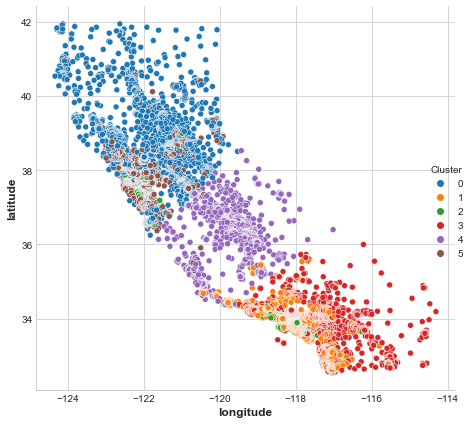

In [18]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

Now let's look at a couple plots to see how effective this was. First, a scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas on the coasts.

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

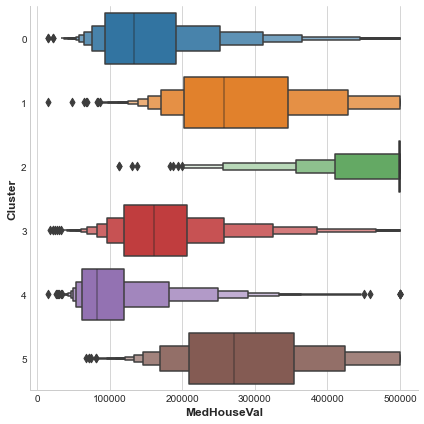

In [21]:
X["MedHouseVal"] = df["median_house_value"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);

In [23]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

*Principal Component Analysis (PCA)*

PCA as a partitioning of the variation in the data. PCA is a great tool to discover important relationships in the data. PCA is tipically applied to standarized data.

## modelos

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


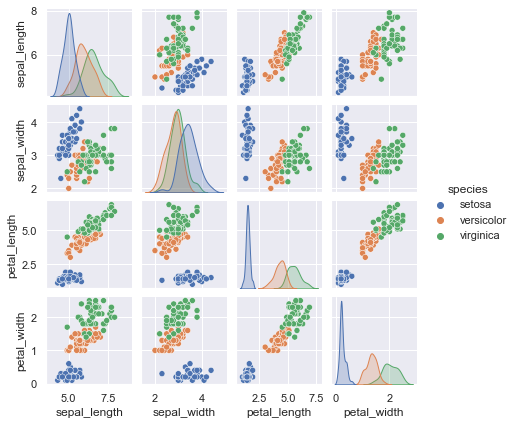

In [2]:
import seaborn as sns
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [3]:
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)

y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [5]:
?train_test_split

In [6]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(X_train, y_train) # 3. fit model to data
y_model = model.predict(X_test) # 4. predict on new data

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9736842105263158

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_model, target_names=y_iris.unique()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


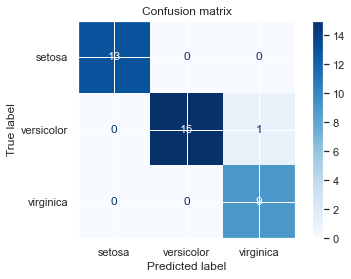

In [9]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=y_iris.unique(),
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)
plt.show()

## Pipelines

In [20]:
import pandas as pd

from sklearn.model_selection import train_test_split

data = pd.read_csv("melb_data.csv")

y = data.Price
X = data.drop(['Price'], axis=1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=2)

In [21]:
X_train_full.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [22]:
X_train_full.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [23]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [24]:
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [25]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 6941 to 7336
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           10864 non-null  object 
 1   Method         10864 non-null  object 
 2   Regionname     10864 non-null  object 
 3   Rooms          10864 non-null  int64  
 4   Distance       10864 non-null  float64
 5   Postcode       10864 non-null  float64
 6   Bedroom2       10864 non-null  float64
 7   Bathroom       10864 non-null  float64
 8   Car            10811 non-null  float64
 9   Landsize       10864 non-null  float64
 10  BuildingArea   5701 non-null   float64
 11  YearBuilt      6582 non-null   float64
 12  Lattitude      10864 non-null  float64
 13  Longtitude     10864 non-null  float64
 14  Propertycount  10864 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.3+ MB


***

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

In [29]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [30]:
from sklearn.metrics import mean_absolute_error


my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])


my_pipeline.fit(X_train, y_train)


preds = my_pipeline.predict(X_valid)


score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 166480.01053212007
